# **Model to Predict Ice Cream Sales Using Temperature**
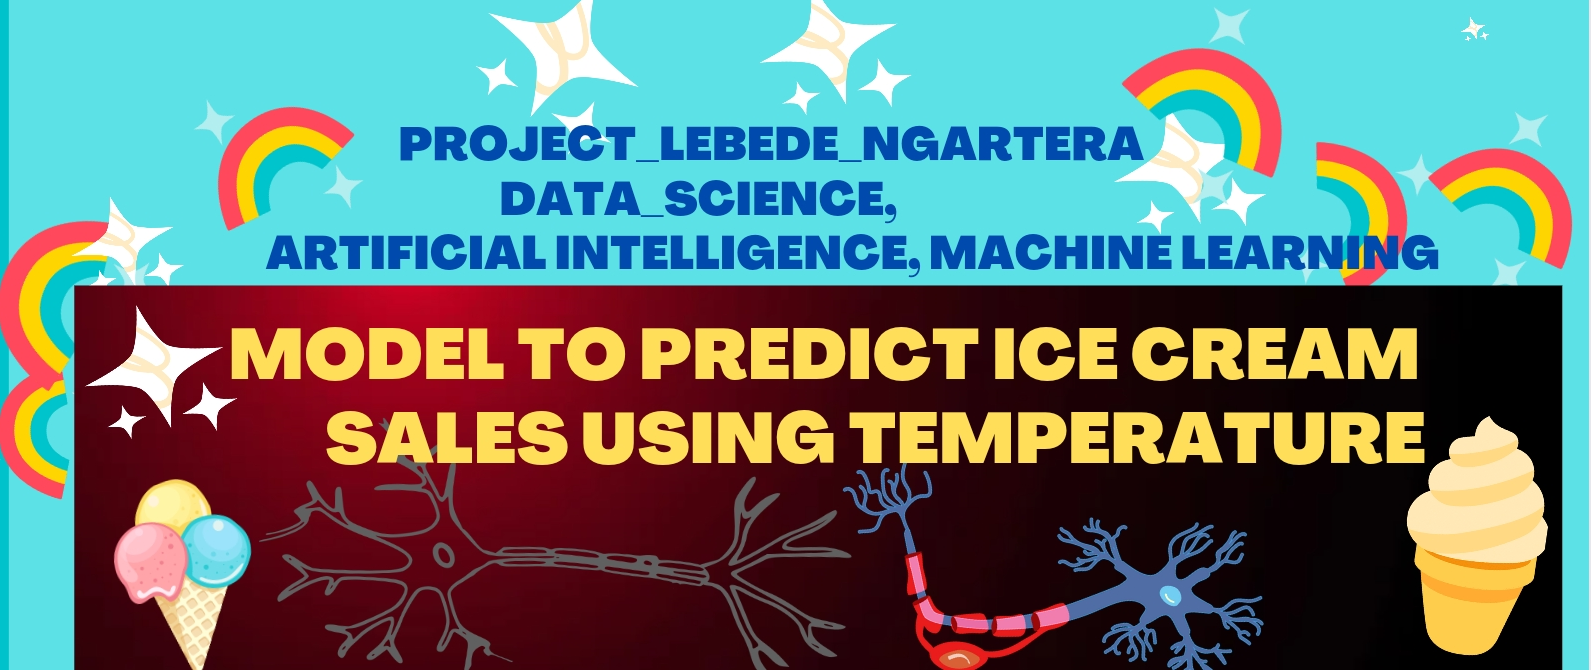

# PROJECT STATEMENT


- We own an ice cream business and we would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). We decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example, we will cover regression in more details in future projects. 


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>


#**First step**:  **IMPORT LIBRARIES**

In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Second step: IMPORT DATASET**

Import CSV file entitled "SalesData.csv"

In [ ]:
# import CSV file entitled "SalesData.csv"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales_df = pd.read_csv('/content/drive/My Drive/SalesData.csv')

In [ ]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
sales_df.tail(5)

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# **Third step: DATASET VISUALIZATION**

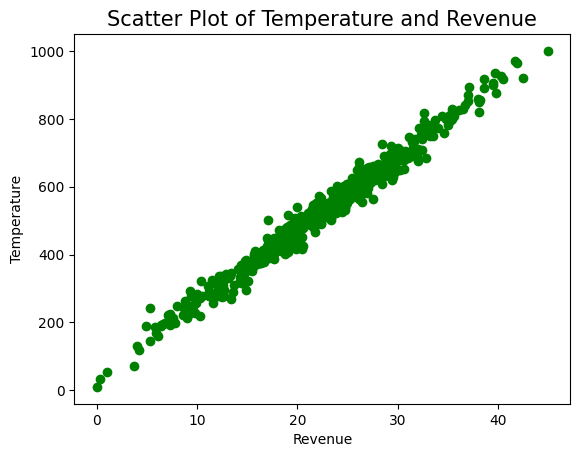

In [ ]:
plt.scatter(sales_df['Temperature'], sales_df['Revenue'],color='g')
plt.title("Scatter Plot of Temperature and Revenue", fontsize = 15) # title of scatter plot
plt.xlabel("Revenue", fontsize = 10) # x-axis label
plt.ylabel("Temperature", fontsize = 10) # y-axis label
plt.savefig("Scatter Plot of Revenue and Temperature") # save generated scatter plot at program location
plt.show() # show scatter plot

# **Fourth step: CREATE TESTING AND TRAINING DATASET**

In [ ]:
x_train=sales_df['Temperature']
y_train=sales_df['Revenue']


#**Fifth step: BUILD AND TRAIN THE MODEL**

In [ ]:
x_train.shape

(500,)

In [ ]:
y_train.shape

(500,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(x_train,y_train, epochs= 1000)

Epoch 1/1000
16/16 [==============================] - 1s 3ms/step - loss: 306904.0625
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 265862.0938
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 228245.5625
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 194924.1719
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 165427.5312
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 139565.5000
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 116829.0391
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 97271.7734
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 80327.6797
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 66142.7969
Epoch 11/1000
16/16 [==============================] - 0s 3ms/step - loss: 53827.3203
Epoch 12/1000
16/16 [==============================] - 0

#**Sixth step: EVALUATE THE MODEL** 

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

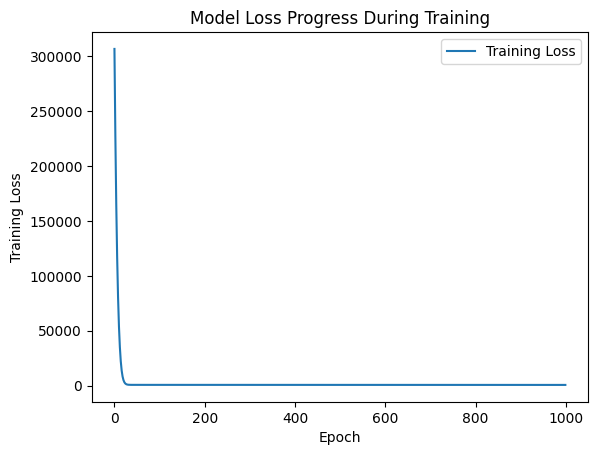

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

[array([[21.513762]], dtype=float32), array([44.887894], dtype=float32)]

In [ ]:
# Use the trained model to perform predictions
Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions Using Trained ANN =', Revenue)


1/1 [==============================] - 0s 78ms/step
Revenue Predictions Using Trained ANN = [[152.4567]]


16/16 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

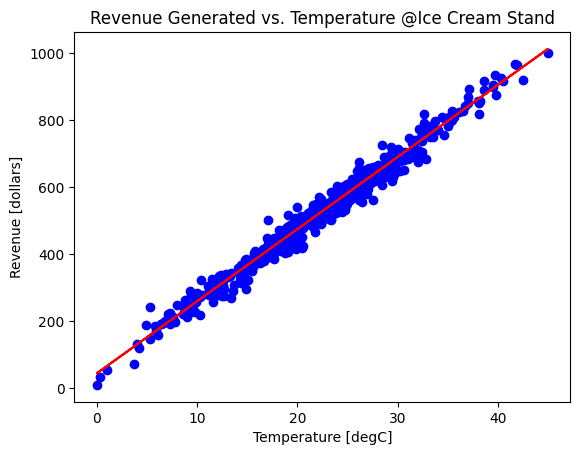

In [ ]:
plt.scatter(x_train, y_train, color = 'b')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

# **Seventh step (OPTIONAL): CONFIRM USING REGRESSION KIT IN SCIKIT LEARN**

In [ ]:
x_train = x_train.values.reshape(-1,1)

In [ ]:
x_train.shape

(500, 1)

In [ ]:
y_train = y_train.values.reshape(-1,1)

In [ ]:
y_train.shape

(500, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = False)
regressor.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[23.22442357]]
Linear Model Coeff(b) 0.0


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

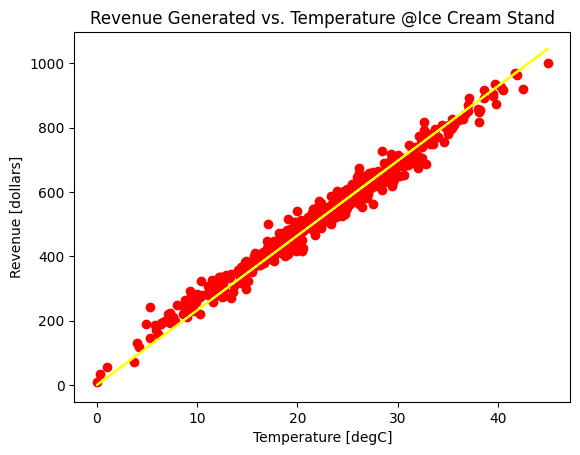

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'yellow')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

NOW YOU HAVE BUILT OUR NEURAL NETWORK MODEL USING TENSORFLOW  IN GOOGLE COLAB! Thanks!!!